#### Import các thư viện cần cho mô hình predict obesity

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#### Tiền xử lý dữ liệu

In [2]:
df = pd.read_excel('Obesity_Dataset.xlsx') # Đọc dữ liệu từ file
df.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,1,19,168,2,2,1,1,2,2,1,2,4,2,5,1
1,1,21,172,2,1,1,3,2,1,2,2,2,2,2,1
2,1,23,175,2,2,3,1,3,1,1,2,1,2,5,1
3,1,24,170,2,2,3,1,3,1,1,2,1,2,2,1
4,1,25,175,2,2,3,1,2,1,3,2,1,1,5,1


In [3]:
print(df.dtypes) # Đọc kiểu dữ liệu

Sex                                  int64
Age                                  int64
Height                               int64
Overweight_Obese_Family              int64
Consumption_of_Fast_Food             int64
Frequency_of_Consuming_Vegetables    int64
Number_of_Main_Meals_Daily           int64
Food_Intake_Between_Meals            int64
Smoking                              int64
Liquid_Intake_Daily                  int64
Calculation_of_Calorie_Intake        int64
Physical_Excercise                   int64
Schedule_Dedicated_to_Technology     int64
Type_of_Transportation_Used          int64
Class                                int64
dtype: object


In [4]:
print(df.describe()) # Thống kê mô tả dữ liệu

               Sex          Age       Height  Overweight_Obese_Family  \
count  1610.000000  1610.000000  1610.000000              1610.000000   
mean      1.557764    33.115528   167.741615                 1.834783   
std       0.496806     9.835076     7.979873                 0.371492   
min       1.000000    18.000000   150.000000                 1.000000   
25%       1.000000    25.000000   161.000000                 2.000000   
50%       2.000000    32.000000   168.000000                 2.000000   
75%       2.000000    41.000000   174.000000                 2.000000   
max       2.000000    54.000000   193.000000                 2.000000   

       Consumption_of_Fast_Food  Frequency_of_Consuming_Vegetables  \
count               1610.000000                        1610.000000   
mean                   1.729193                           2.063354   
std                    0.444515                           0.746043   
min                    1.000000                           1.00

In [5]:
# Kiểm tra null
df.isna().sum() 

Sex                                  0
Age                                  0
Height                               0
Overweight_Obese_Family              0
Consumption_of_Fast_Food             0
Frequency_of_Consuming_Vegetables    0
Number_of_Main_Meals_Daily           0
Food_Intake_Between_Meals            0
Smoking                              0
Liquid_Intake_Daily                  0
Calculation_of_Calorie_Intake        0
Physical_Excercise                   0
Schedule_Dedicated_to_Technology     0
Type_of_Transportation_Used          0
Class                                0
dtype: int64

In [6]:
# Kiểm Tra Giá Trị Duy Nhất Trong Các Cột Phân Loại

categorical_columns = [
    'Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food',
    'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily',
    'Food_Intake_Between_Meals', 'Smoking', 'Liquid_Intake_Daily',
    'Calculation_of_Calorie_Intake', 'Physical_Excercise',
    'Schedule_Dedicated_to_Technology', 'Type_of_Transportation_Used'
]
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")


# Mục đích: Xác định các giá trị duy nhất trong mỗi cột phân loại để hiểu cách mã hóa và phạm vi giá trị.
# Tại sao: Bước này xác nhận rằng các biến phân loại đã được mã hóa thành số nguyên (không cần mã hóa nhãn bổ sung) 
# Và cung cấp thông tin về số lượng lớp, hữu ích cho việc chọn mô hình và kỹ thuật xử lý đặc trưng.

Unique values in Sex: [1 2]
Unique values in Overweight_Obese_Family: [2 1]
Unique values in Consumption_of_Fast_Food: [2 1]
Unique values in Frequency_of_Consuming_Vegetables: [1 3 2]
Unique values in Number_of_Main_Meals_Daily: [1 3 2]
Unique values in Food_Intake_Between_Meals: [2 3 1 4]
Unique values in Smoking: [2 1]
Unique values in Liquid_Intake_Daily: [1 2 3]
Unique values in Calculation_of_Calorie_Intake: [2 1]
Unique values in Physical_Excercise: [4 2 1 3 5]
Unique values in Schedule_Dedicated_to_Technology: [2 1 3]
Unique values in Type_of_Transportation_Used: [5 2 3 4 1]


In [ ]:
multi_cat_cols = [
    'Frequency_of_Consuming_Vegetables',
    'Number_of_Main_Meals_Daily',
    'Food_Intake_Between_Meals',
    'Liquid_Intake_Daily',
    'Physical_Excercise',
    'Schedule_Dedicated_to_Technology',
    'Type_of_Transportation_Used'
]

X = pd.get_dummies(df.drop(columns='Class'), columns=multi_cat_cols)
y = df['Class'].values

In [7]:
df['Class'].value_counts() # Kiểm tra độ chênh của biến mục tiêu (y)

# 1. Thiếu cân, 2. Tiêu chuẩn, 3. Thừa cân, 4. Béo phì

Class
2    658
3    592
4    287
1     73
Name: count, dtype: int64

#### Tiền xử lý dữ liệu cho mô hình, chia tập dữ liệu 

In [8]:
# mã hóa đầu ra y (cột Class)
label_encoder = LabelEncoder()
y_endcoder = label_encoder.fit_transform(df['Class'])

In [9]:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [10]:
print("Class mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Class mapping: {1: 0, 2: 1, 3: 2, 4: 3}


In [11]:
X = df.drop(columns=['Class'])  
y = y_endcoder # gán y bằng y đã mã hóa nhãn

In [14]:
# Lưu danh sách cột
joblib.dump(X.columns.tolist(), 'columns.pkl')

['columns.pkl']

In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [16]:
df['Class'].value_counts() # Kiểm tra độ chênh của biến mục tiêu (y)

# 1. Thiếu cân, 2. Tiêu chuẩn, 3. Thừa cân, 4. Béo phì

Class
2    658
3    592
4    287
1     73
Name: count, dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Kiểm tra phân bố sau SMOTE
print("Phân bố lớp sau SMOTE:")
print(pd.Series(y_train).value_counts().sort_index())

Phân bố lớp sau SMOTE:
0    512
1    512
2    512
3    512
Name: count, dtype: int64


#### Huấn luyện mô hình và đánh giá hiệu suất

#### Train XGBoost

In [18]:
xgb = XGBClassifier(enable_categorical=True)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [19]:
joblib.dump(xgb, 'xgb_model.pkl')

['xgb_model.pkl']

In [20]:
xgb.score(X_train, y_train), xgb.score(X_test, y_test)

(1.0, 0.8509316770186336)

              precision    recall  f1-score   support

           0       0.69      0.56      0.62        16
           1       0.89      0.86      0.88       146
           2       0.85      0.88      0.86       108
           3       0.79      0.85      0.81        52

    accuracy                           0.85       322
   macro avg       0.80      0.79      0.79       322
weighted avg       0.85      0.85      0.85       322



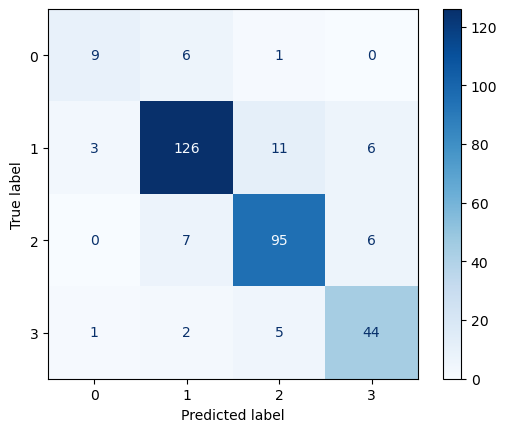

In [21]:
# Dự đoán trên XGBoost
y_pred = xgb.predict(X_test)

# Báo cáo
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap='Blues')

#### Dùng GridSearchCV tối ưu XGBoost

In [22]:
from sklearn.model_selection import GridSearchCV

# 1. Định nghĩa lưới tham số
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

In [23]:
# Train xgboost
xgb = XGBClassifier()

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',   # hoặc 'f1_macro', 'roc_auc' tùy task
    cv=5,
    verbose=2,
    n_jobs=-1,
    
)
grid.fit(X_train, y_train)

print("Tổ hợp tốt nhất được tìm ra:", grid.best_params_)
print("Điểm đánh giá cao nhất:", grid.best_score_) # 	Điểm trung bình validation của Grid Search (trong fit)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Tổ hợp tốt nhất được tìm ra: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Điểm đánh giá cao nhất: 0.8901413322201682


In [24]:
joblib.dump(grid, 'grid_model.pkl')

['grid_model.pkl']

In [25]:
print("Tổ hợp tốt nhất được tìm ra:", grid.best_params_)
print("Điểm đánh giá trung bình:", grid.best_score_) # 	Điểm trung bình validation của Grid Search (trong fit)

Tổ hợp tốt nhất được tìm ra: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Điểm đánh giá trung bình: 0.8901413322201682


In [26]:
grid.score(X_train, y_train), grid.score(X_test, y_test) # Điểm trên tập test cuối cùng, để đánh giá mô hình cuối cùng


(1.0, 0.860248447204969)

              precision    recall  f1-score   support

           0       0.71      0.62      0.67        16
           1       0.89      0.84      0.87       146
           2       0.84      0.90      0.87       108
           3       0.87      0.90      0.89        52

    accuracy                           0.86       322
   macro avg       0.83      0.82      0.82       322
weighted avg       0.86      0.86      0.86       322



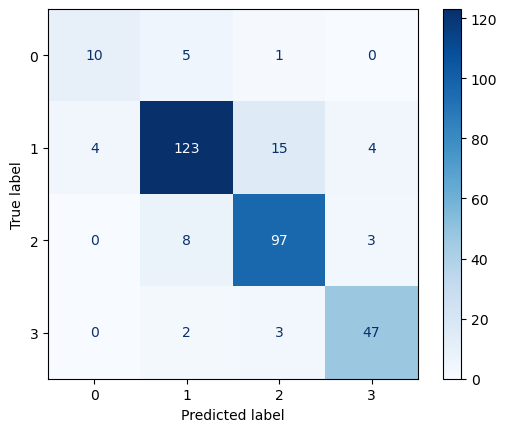

In [27]:
# Dự đoán trên GridResearch
y_pred = grid.predict(X_test)

# Báo cáo
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap='Blues')

### Train Dummy Classifier

In [28]:
X = df.drop(columns=['Class'])  
y_base = df['Class'] 

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y_base, test_size=0.2, random_state=42 )

In [30]:
# Train dummy
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [31]:
dummy.score(X_train, y_train), dummy.score(X_test, y_test)

(0.39751552795031053, 0.453416149068323)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.45      1.00      0.62       146
           3       0.00      0.00      0.00       108
           4       0.00      0.00      0.00        52

    accuracy                           0.45       322
   macro avg       0.11      0.25      0.16       322
weighted avg       0.21      0.45      0.28       322



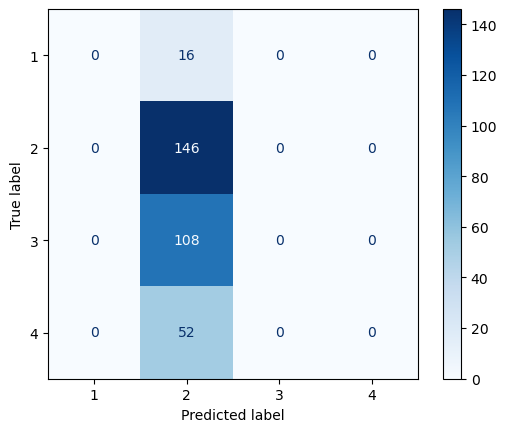

In [32]:
# Dự đoán
y_pred = dummy.predict(X_test)

# Báo cáo
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dummy.classes_)
disp.plot(cmap='Blues')

### Thử nghiệm trên mô hình khác (Random Forest, AdaBoost)

1. Random Forest

In [33]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(1.0, 0.8540372670807453)

              precision    recall  f1-score   support

           1       1.00      0.50      0.67        16
           2       0.88      0.86      0.87       146
           3       0.80      0.90      0.85       108
           4       0.88      0.87      0.87        52

    accuracy                           0.85       322
   macro avg       0.89      0.78      0.81       322
weighted avg       0.86      0.85      0.85       322



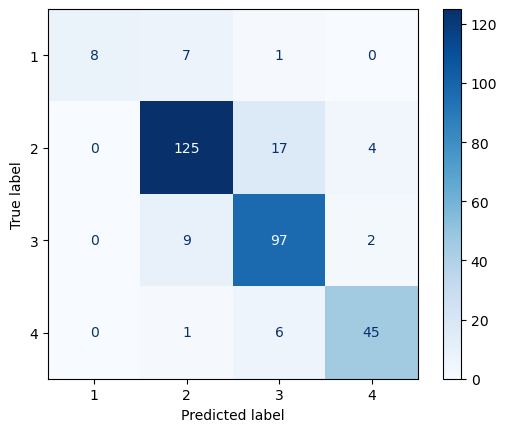

In [35]:
y_pred = rf.predict(X_test)

# Báo cáo
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')

2. AdaBoost

In [36]:
ada = AdaBoostClassifier(algorithm='SAMME')
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME')

In [37]:
ada.score(X_train, y_train), ada.score(X_test, y_test)

(0.702639751552795, 0.6614906832298136)

              precision    recall  f1-score   support

           1       0.31      0.25      0.28        16
           2       0.76      0.73      0.75       146
           3       0.61      0.66      0.63       108
           4       0.58      0.60      0.59        52

    accuracy                           0.66       322
   macro avg       0.57      0.56      0.56       322
weighted avg       0.66      0.66      0.66       322



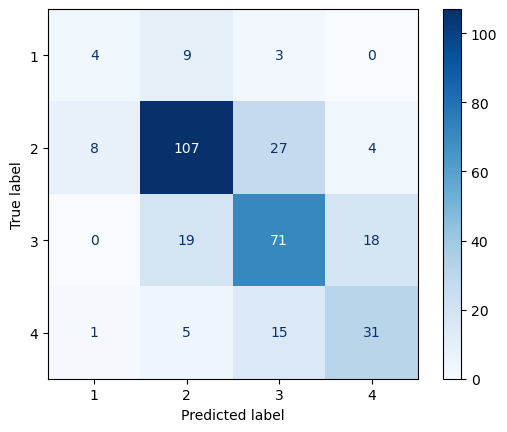

In [38]:
y_pred = ada.predict(X_test)

# Báo cáo
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot(cmap='Blues')